<a href="https://colab.research.google.com/github/faishal-ai/machine-learning_2025/blob/main/KUIS1_ML_2341720218_Faishal_Harist_Rahmawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [23]:
# Jawab Soal 1
# Kerjakan pada cell ini
print('Pengecekkan Dimensi : ')
print(df.shape)
print('Pengecekkan Tipe Data : ')
df.info()
print('Pengecekkan Data Hilang')
df.isnull().sum()
# Anda diperbolehkan menambah cell jika diperlukan

Pengecekkan Dimensi : 
(48842, 15)
Pengecekkan Tipe Data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
Pengecekkan Data Hilang


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [24]:
# Jawab Soal 2
# Kerjakan pada cell ini

df['occupation'].fillna(value=df['occupation'].mode()[0], inplace=True)
df['workclass'].fillna(value=df['workclass'].mode()[0], inplace=True)
df['native-country'].fillna(value=df['native-country'].mode()[0], inplace=True)


# Cek kembali apakah masih terdapat data yang hilang
print('mengecek apakah masih ada data yang hilang')
print("Kolom nilai yang hilang (missing value) Adalah :")
print(df.isnull().sum())

# Anda diperbolehkan menambah cell jika diperlukan

mengecek apakah masih ada data yang hilang
Kolom nilai yang hilang (missing value) Adalah :
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-3548239963.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].fillna(value=df['occupation'].mode()[0], inplace=True)
/tmp/ipython-input-3548239963.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [25]:
# Jawab Soal 2
# Kerjakan pada cell ini
print("Unique values in 'race':", df['race'].unique())
print("Unique values in 'sex':", df['sex'].unique())
print("Unique values in 'native-country':", df['native-country'].unique())
print("Unique values in 'marital-status':", df['marital-status'].unique())
print("Unique values in 'occupation':", df['occupation'].unique())
print("Unique values in 'income':", df['income'].unique())
print("Unique values in 'workclass':", df['workclass'].unique())
print("Unique values in 'education':", df['education'].unique())
print("Unique values in 'relationship':", df['relationship'].unique())
# Anda diperbolehkan menambah cell jika diperlukan

Unique values in 'race': ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Unique values in 'sex': ['Male' 'Female']
Unique values in 'native-country': ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
Unique values in 'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Unique values in 'occupation': ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-sup

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

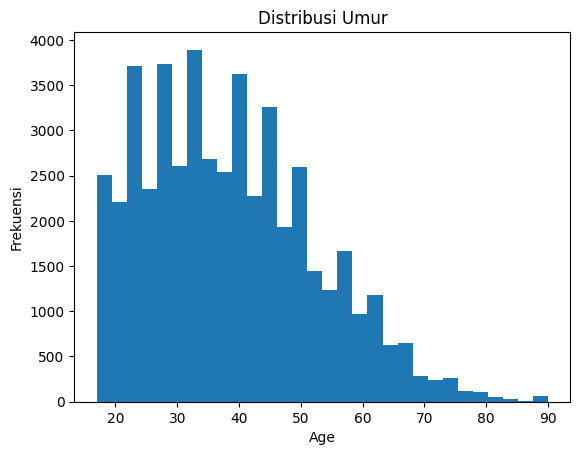

In [26]:
# Jawab 1.1 - Histrogra
plt.figure()
plt.hist(df['age'], bins=30)
plt.title(f'Distribusi Umur')
plt.xlabel('Age'); plt.ylabel('Frekuensi')
plt.show()

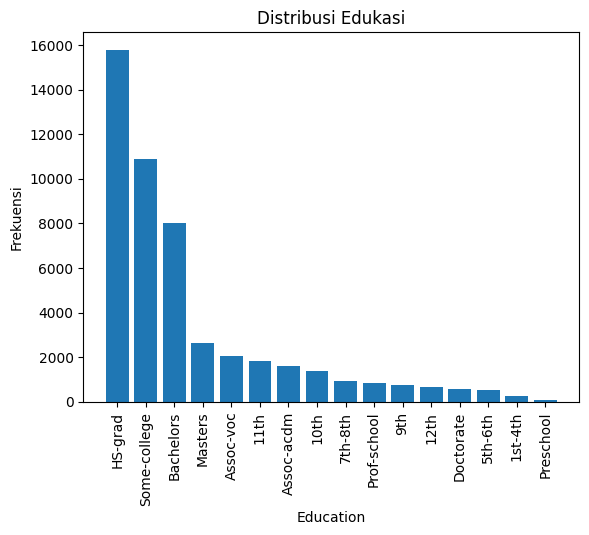

In [28]:
# Jawab 1.2 - Barchart
plt.figure()
education_counts = df['education'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.title('Distribusi Edukasi')
plt.xlabel('Education'); plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()

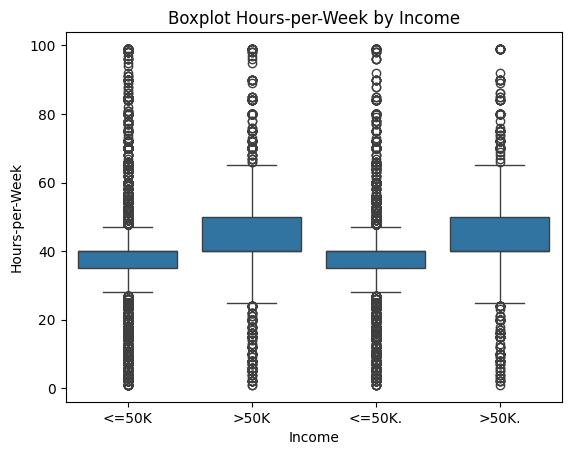

In [29]:
# Jawab 1.3 - Boxplot
plt.figure()
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Boxplot Hours-per-Week by Income')
plt.xlabel('Income'); plt.ylabel('Hours-per-Week')
plt.show()

In [27]:
# Jawab 1.4 - Lineplot
plt.figure()
sns.lineplot(x='age', y='capital-gain', data=df, label='Capital Gain')
sns.lineplot(x='age', y='capital-loss', data=df, label='Capital Loss')
plt.title('Capital Gain and Loss Over Age')
plt.xlabel('Age'); plt.ylabel('Capital')
plt.legend()
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [30]:
# Jawab dengan komentar python

print("1. Pola distribusinya condong ke kanan, mayoritas orang ada di kisaran usia 20 sampai 30 tahun.")
print("2. Bagian kosong saya isi dengan nilai rata-rata, soalnya cara ini lebih simple dan nggak bikin distribusi jadi berantakan.")
print("3. Jumlahnya banyak, bisa lebih dari 100. Kategori dengan outlier terbanyak ada di kelompok <=50K.")


1. Pola distribusinya condong ke kanan, mayoritas orang ada di kisaran usia 20 sampai 30 tahun.
2. Bagian kosong saya isi dengan nilai rata-rata, soalnya cara ini lebih simple dan nggak bikin distribusi jadi berantakan.
3. Jumlahnya banyak, bisa lebih dari 100. Kategori dengan outlier terbanyak ada di kelompok <=50K.


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [31]:
# Jawab Soal 1
# Kerjakan pada cell ini
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])
df.head()
# Anda diperbolehkan menambah cell jika diperlukan

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

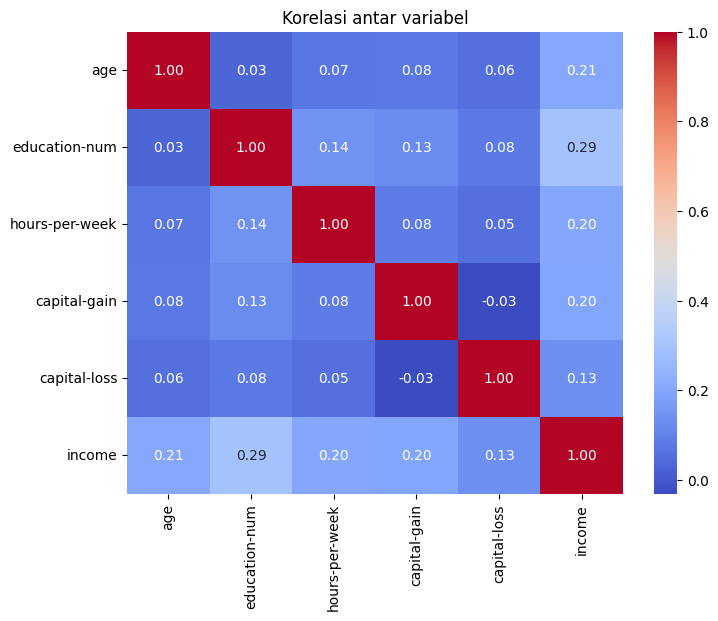

In [32]:
# Jawab Soal 1
# Kerjakan pada cell ini

cols = ['age','education-num','hours-per-week','capital-gain','capital-loss','income']
corr = df[cols].corr()
#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel")
plt.show()

# Anda diperbolehkan menambah cell jika diperlukan

In [33]:
# Hasil analisis jelaskan pada cell ini
print("- Pendidikan berhubungan positif dengan income.")
print("- Capital gain jadi faktor paling berpengaruh pada income.")
print("- Capital loss juga berkorelasi, tapi lemah.")
print("- Jam kerja sedikit berkorelasi dengan income.")
print("- Usia lebih tua cenderung berpenghasilan lebih tinggi.")

- Pendidikan berhubungan positif dengan income.
- Capital gain jadi faktor paling berpengaruh pada income.
- Capital loss juga berkorelasi, tapi lemah.
- Jam kerja sedikit berkorelasi dengan income.
- Usia lebih tua cenderung berpenghasilan lebih tinggi.


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [18]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


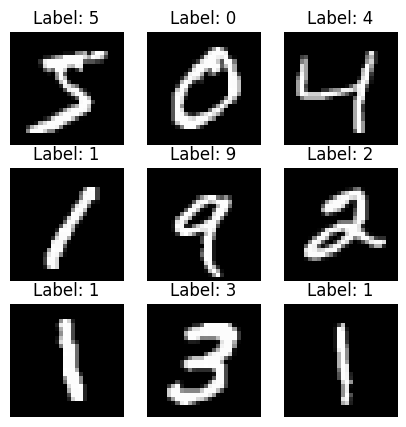

In [19]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

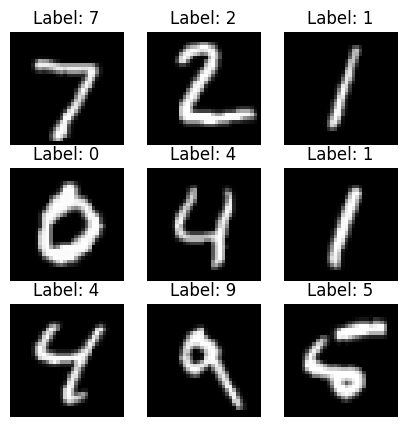

In [35]:
# Jawab Soal 1
# Kerjakan pada cell ini
import cv2

X_test_upsampled = np.empty((X_test.shape[0], 32, 32), dtype=np.float32)

for i in range(X_test.shape[0]):
    X_test_upsampled[i] = cv2.resize(X_test[i], (32, 32))

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()
# Anda diperbolehkan menambah cell jika diperlukan

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

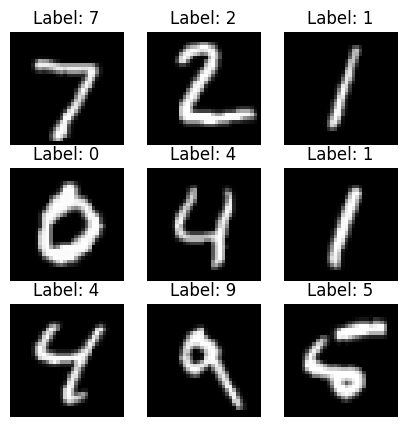

In [36]:
# Jawab Soal 2
# Kerjakan pada cell ini
X_test_normalized = X_test_upsampled / 255.0

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test_normalized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()
# Anda diperbolehkan menambah cell jika diperlukan

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [37]:
# Jawab Soal 3
# Kerjakan pada cell ini
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

print("Shape of X_test_flattened:", X_test_flattened.shape)
# Anda diperbolehkan menambah cell jika diperlukan

Shape of X_test_flattened: (10000, 1024)
